<center>


<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a>(https://github.com/wikistat/Intro-Python)


### Fonctionnalités de `pandas`
La richesse des fonctionnalités de la librairie `pandas` est une des raisons, si ce n'est la principale,  d'utiliser Python pour extraire, préparer, éventuellement analyser, des données. En voici un bref aperçu.
- *Objets*: les classes `Series` et `DataFrame` ou *table de données*.
- *Lire, écrire* création et exportation de tables de données à partir de fichiers textes (séparateurs, `.csv`, format fixe, compressés), binaires (HDF5 avec `Pytable`), HTML, XML, JSON, MongoDB, SQL...
- *Gestion*  d'une table: sélection des lignes, colonnes, transformations, réorganisation par niveau d'un facteur, discrétisation de variables quantitatives, exclusion ou imputation élémentaire de données manquantes, permutation et échantillonnage aléatoire, variables indicatrices, chaînes de caractères...
- *Statistiques* élémentaires  uni et bivariées, tri à plat (nombre de modalités, de valeurs nulles, de valeurs manquantes...), graphiques associés, statistiques par groupe, détection élémentaire de valeurs atypiques...
- *Manipulation* de tables: concaténations, fusions, jointures, tri, gestion des types et formats...
### Références
Ce tutoriel élémentaire s'inspire largement du livre de référence (Mc Kinney, 2013) et de la [documentation en ligne](http://pandas.pydata.org/pandas-docs/stable/) à consulter sans modération.


## ETUDIER le DATSET de TITANIC

Les données choisies pour illustrer ce tutoriel sont issues d'une compétition du site [Kaggle](https://www.kaggle.com/): [Titanic: Machine learnic from Disaster](https://www.kaggle.com/c/titanic-gettingStarted). Le concours est terminé mais les [données](https://www.kaggle.com/c/titanic-gettingStarted/data) sont toujours disponibles sur le site avec des tutoriels utilisant Excel, Python ou R.

Une des raisons du drame, qui provoqua la mort de 1502 personnes sur les 2224 passagers et membres d'équipage, fut le manque de canots de sauvetage. Il apparaît que les chances de survie dépendaient de différents facteurs (sexe, âge, classe...).

Nous envisageons de construire un modèle de prévision (classification supervisée) de survie en fonction de ces facteurs. Les données sont composées d'un échantillon d'apprentissage (891) et d'un échantillon test (418) chacun décrit par 11 variables dont la première indiquant la survie ou non lors du naufrage.

Liste des variables

Label  | Intitulé
----------|-------------
survival   |     Survival (0 = No; 1 = Yes)
pclass   |       Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name    |       Name
sex     |        Sex
age     |        Age
sibsp   |        Number of Siblings/Spouses Aboard
parch    |       Number of Parents/Children Aboard
ticket   |       Ticket Number
fare    |        Passenger Fare
cabin   |        Cabin
embarked |       Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### 2.2 *DataFrame*
Cette classe est proche de celle du même nom dans le langage R, il s'agit d'associer avec le même index de lignes des colonnes ou variables de types différents (entier, réel, booléen, caractère). C'est un tableau bi-dimensionnel avec des index de lignes et de colonnes mais il peut également être vu comme une liste de `Series` partageant le même index. L'index de colonne (noms des variables) est un objet de type `dict` (dictionnaire). C'est la classe qui sera principalement utilisée dans ce tutoriel.

In [ ]:
# Exemple de data frame
import pandas as pd
data = {"state": ["Ohio", "Ohio", "Ohio",
       "Nevada", "Nevada"],
     "year": [2000, 2001, 2002, 2001, 2002],
     "pop": [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = pd.DataFrame(data)
# ordre des colonnes
pd.DataFrame(data, columns=["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [ ]:
# Frame 2 , colonne debt avec des valeurs manquantes (NaN)
# Changer les noms des index
frame2=pd.DataFrame(data, columns=["year", "state", "pop", "debt"],
                    index=["one", "two", "three", "four", "five"])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [ ]:
# valeurs d'une colonne
frame["state"]

,state
0,Ohio
1,Ohio
2,Ohio
3,Nevada
4,Nevada


In [ ]:
frame.year

,year
0,2000
1,2001
2,2002
3,2001
4,2002


In [ ]:
# "imputation"
frame2["debt"] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [ ]:
# créer une nouvelle variable
frame2["eastern"] = (frame2.state == "Ohio")
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,16.5,True
two,2001,Ohio,1.7,16.5,True
three,2002,Ohio,3.6,16.5,True
four,2001,Nevada,2.4,16.5,False
five,2002,Nevada,2.9,16.5,False


In [ ]:
# supprimer une  variable
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

### 3.2 Exemple
Les données du naufrage du Titanic  illustrent l'utilisation de `pandas`.

In [ ]:
# Importations
import pandas as pd
import numpy as np

df = pd.read_csv('titanic-train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# par défaut retourne les 5 dernières lignes du DF
df.tail()
# par défaut retourne les 5 premières lignes du DF
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Des variables sont inexploitables
# Choisir les colonnes utiles
df=pd.read_csv("titanic-train.csv",
    usecols=[1,2,4,5,6,7,9,11],nrows=5)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


À partir de la version 0.15, `pandas`, inclut un type `category` assez proche de celui ` factor` de R. Il devrait normalement être déclaré dans un dictionnaire au moment par exemple de la lecture (`dtype={"Surv":pd.Categorical...}`) mais ce n'est pas le cas, c'est donc le type objet qui est déclaré puis modifié. Il est vivement recommandé de bien affecter les bons types à chaque variable ne serait-ce que pour éviter de faire des opérations douteuses, par exemple arithmétiques sur des codes de modalités.

In [ ]:
#df=pd.read_csv("titanic-train.csv",skiprows=1,header=None,usecols=[1,2,4,5,9,11],
#  names=["Surv","Classe","Genre","Age","Prix","Port"],dtype={"Surv":object,
#    "Classe":object,"Genre":object,"Port":object})
df=pd.read_csv("titanic-train.csv",skiprows=1,header=None,usecols=[1,2,4,5,9,11],
  names=["Surv","Classe","Genre","Age","Prix","Port"])
df.head()

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
df.dtypes

,0
Surv,int64
Classe,int64
Genre,object
Age,float64
Prix,float64
Port,object


Redéfinition des bons types.

In [ ]:
df["Surv"]=pd.Categorical(df["Surv"],ordered=False)
df["Classe"]=pd.Categorical(df["Classe"],ordered=False)
df["Genre"]=pd.Categorical(df["Genre"],ordered=False)
df["Port"]=pd.Categorical(df["Port"],ordered=False)
df.dtypes

,0
Surv,category
Classe,category
Genre,category
Age,float64
Prix,float64
Port,category


Remarque: il est également possible de tout lire avant de laisser "tomber" les variable inexploitables. C'est le rôle de la commande: drop

RQ: axis 1 : pour les colonnes, axis 0 : pour les lignes

`df = df.drop(["Name", "Ticket", "Cabin"], axis=1)`

### 3.3 Echantillonnage simple
Comme dans R, le type `DataFrame` de Python est chargé en mémoire. Si, malgré les options précédentes permettant de sélectionner, les colonnes, les types des variables... le fichier est encore trop gros, il reste possible, avant de chercher une configuration matérielle lourde et en première approximation, de tirer un échantillon aléatoire simple selon une distribution uniforme. Un tirage stratifié demanderait plus de travail. Cela suppose de connaître le nombre de ligne du fichier ou une valeur inférieure proche.

In [ ]:
# pour les données titanic:
N=891  # taille du fichier
n=200  # taille de l'échantillon
lin2skipe=[0] # ne pas lire la première ligne
# Objectif : ne pas lire N-n lignes tirées aléatoirement
#La méthode extend() extrait les éléments de l'itérable transmis en argument,
#agrandit la taille de la liste pour qu'elle puisse contenir les éléments extraits,
#Pour des objets itérables, son fonctionnement est similaire à l'opérateur +=.
lin2skipe.extend(np.random.choice(np.arange(1,N+1),
    (N-n),replace=False))

In [ ]:
# pour tirer l'échantillon de n lignes on uilise skiprows qui ne prend pas les N-n
df_small=pd.read_csv("titanic-train.csv",skiprows=lin2skipe,header=None,
    usecols=[1,2,4,5,9,11],names=["Surv","Classe","Genre","Age","Prix","Port"])
df_small

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,0,3,male,NaN,8.4583,Q
2,0,1,male,54.0,51.8625,S
3,1,3,female,4.0,16.7000,S
4,0,3,female,14.0,7.8542,S
...,...,...,...,...,...,...
195,0,3,female,NaN,69.5500,S
196,1,2,female,27.0,13.8583,C
197,1,1,female,47.0,52.5542,S
198,0,3,male,NaN,7.8958,S


## 3 Gérer une table de données
### 3.1 Discrétisation d'une variable quantitative
Pour la discrétisation d'une variable quantitative. Il est d'un bon usage de définir les bornes des classes à des quantiles, plutôt qu'également espacées, afin de construire des classes d'effectifs sensiblement égaux.  Ceci est obtenu par la fonction `qcut`. La fonction `cut` propose par défaut des bornes équi-réparties à moins de fournir une liste de ces bornes.

In [ ]:
df["AgeQ"]=pd.qcut(df.Age,3,labels=["Ag1","Ag2",
   "Ag3"])
df["PrixQ"]=pd.qcut(df.Prix,3,labels=["Pr1","Pr2",
   "Pr3"])
df["PrixQ"].describe()
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,0,3,male,22.0,7.2500,S,Ag1,Pr1
1,1,1,female,38.0,71.2833,C,Ag3,Pr3
2,1,3,female,26.0,7.9250,S,Ag2,Pr1
3,1,1,female,35.0,53.1000,S,Ag3,Pr3
4,0,3,male,35.0,8.0500,S,Ag3,Pr1


### 3.2 Modifier / regrouper des modalités
Le recodage des variables qualitatives ou renommage en clair des modalités est obtenu simplement.

In [ ]:
df["Surv"]=df["Surv"].cat.rename_categories(
    ["Vnon","Voui"])
df["Classe"]=df["Classe"].cat.rename_categories(
    ["Cl1","Cl2","Cl3"])
df["Genre"]=df["Genre"].cat.rename_categories(
    ["Gfem","Gmas"])
df["Port"]=df["Port"].cat.rename_categories(
    ["Pc","Pq","Ps"])

In [ ]:
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,Vnon,Cl3,Gmas,22.0,7.2500,Ps,Ag1,Pr1
1,Voui,Cl1,Gfem,38.0,71.2833,Pc,Ag3,Pr3
2,Voui,Cl3,Gfem,26.0,7.9250,Ps,Ag2,Pr1
3,Voui,Cl1,Gfem,35.0,53.1000,Ps,Ag3,Pr3
4,Vnon,Cl3,Gmas,35.0,8.0500,Ps,Ag3,Pr1


Il est possible d'associer recodage et regroupement des modalités en définissant un dictionnaire de transformation.

In [ ]:
data = pd.DataFrame({"food":["bacon","pulled pork",
   "bacon", "Pastrami",
   "corned beef", "Bacon", "pastrami", "honey ham",
   "nova lox"],
   "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox": "salmon"
}
# Eviter les mélanges de majuscules minuscules
# en mettant tout en minuscule
data["animal"] = data["food"].map(
    str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
data["food"].map(lambda x: meat_to_animal[x.lower()])

,food
0,pig
1,pig
2,pig
3,cow
4,cow
5,pig
6,cow
7,pig
8,salmon


### 3.3 Variables indicatrices
Générer des indicatrices des modalités ou *dummy variables*.

In [ ]:
dfs = pd.DataFrame({"key": ["b", "b", "a", "c",
    "a", "b"],"data1": range(6)})
dfs

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
pd.get_dummies(dfs["key"])

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [ ]:
dummies = pd.get_dummies(dfs['key'], prefix='key')
df_with_dummy = dfs[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,False,True,False
1,1,False,True,False
2,2,True,False,False
3,3,False,False,True
4,4,True,False,False
5,5,False,True,False


### 3.4 Permutation et tirage aléatoires
Permutation aléatoire:

In [ ]:
dfs = pd.DataFrame(np.arange(5 * 4).reshape(5, 4))
sampler = np.random.permutation(5)
sampler

array([4, 1, 3, 2, 0])

In [ ]:
dfs

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
dfs.take(sampler)

,0,1,2,3
4,16,17,18,19
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3


Tirage aléatoire avec remplacement ou *bootstrap* ; celui sans remplacement est traité section 3.3.

In [ ]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)
draws = bag.take(sampler)
draws

array([ 4,  5,  5,  6, -1,  4,  4,  6,  6,  7])

## 4 Statistiques descriptives élémentaires
Continuer l'étude des données sur le naufrage du Titanic. Les commandes ci-dessous permettent des premiers diagnostics sur la qualité des données.
### 4.1 Description univariée

In [ ]:
df.dtypes

,0
Surv,category
Classe,category
Genre,category
Age,float64
Prix,float64
Port,category
AgeQ,category
PrixQ,category


In [ ]:
df.describe()

,Age,Prix
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,Vnon,Cl3,Gmas,22.0,7.2500,Ps,Ag1,Pr1
1,Voui,Cl1,Gfem,38.0,71.2833,Pc,Ag3,Pr3
2,Voui,Cl3,Gfem,26.0,7.9250,Ps,Ag2,Pr1
3,Voui,Cl1,Gfem,35.0,53.1000,Ps,Ag3,Pr3
4,Vnon,Cl3,Gmas,35.0,8.0500,Ps,Ag3,Pr1


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

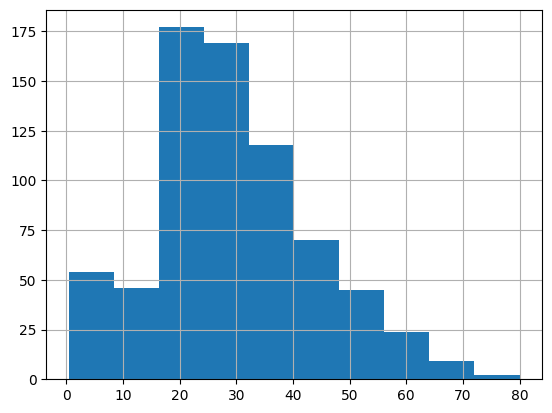

In [ ]:
df["Age"].hist()
plt.show()

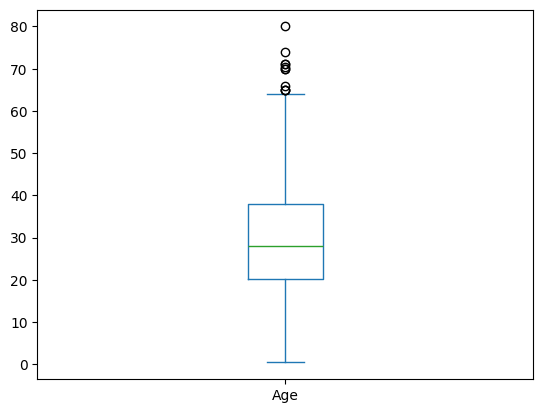

In [ ]:
df["Age"].plot(kind="box")
plt.show()

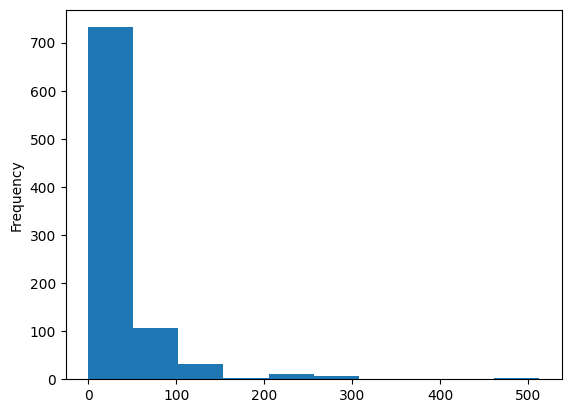

In [ ]:
df["Prix"].plot(kind="hist")
plt.show()

In [ ]:
# qualitatif
df["Surv"].value_counts()

,count
Surv,
Vnon,549
Voui,342


In [ ]:
df["Classe"].value_counts()

,count
Classe,
Cl3,491
Cl1,216
Cl2,184


In [ ]:
df["Genre"].value_counts()

,count
Genre,
Gmas,577
Gfem,314


In [ ]:
df["Port"].value_counts()

,count
Port,
Ps,644
Pc,168
Pq,77


### 4.2 Description bivariée

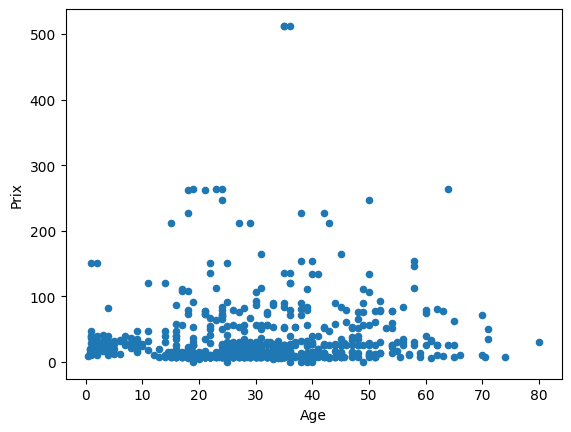

In [ ]:
df.plot(kind="scatter",x="Age",y="Prix")
plt.show()

In [ ]:
# afficher une sélection
df[df["Age"]>60][["Genre","Classe","Age","Surv"]]

,Genre,Classe,Age,Surv
33,Gmas,Cl2,66.0,Vnon
54,Gmas,Cl1,65.0,Vnon
96,Gmas,Cl1,71.0,Vnon
116,Gmas,Cl3,70.5,Vnon
170,Gmas,Cl1,61.0,Vnon
252,Gmas,Cl1,62.0,Vnon
275,Gfem,Cl1,63.0,Voui
280,Gmas,Cl3,65.0,Vnon
326,Gmas,Cl3,61.0,Vnon
438,Gmas,Cl1,64.0,Vnon


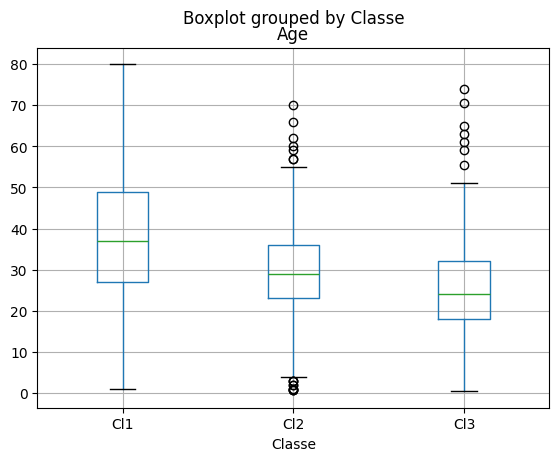

In [ ]:
df.boxplot(column="Age",by="Classe")
plt.show()

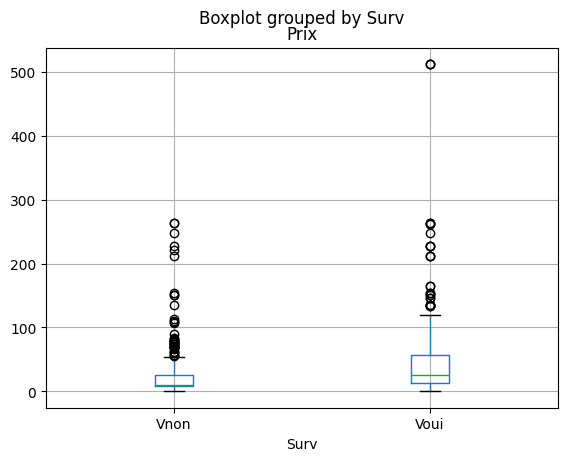

In [ ]:
df.boxplot(column="Prix",by="Surv")
plt.show()

In [ ]:
# table de contingence
table=pd.crosstab(df["Surv"],df["Classe"])
print(table)

Classe  Cl1  Cl2  Cl3
Surv                 
Vnon     80   97  372
Voui    136   87  119


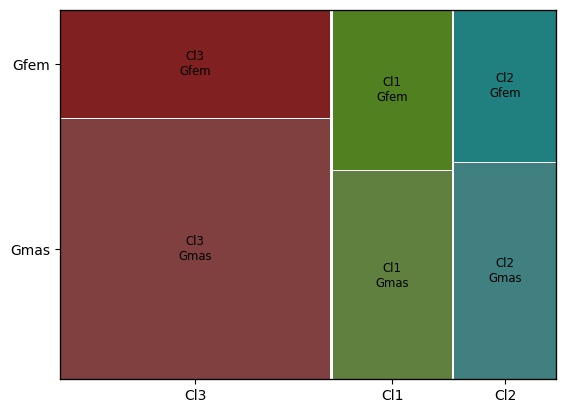

In [ ]:
# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df,["Classe","Genre"])
plt.show()

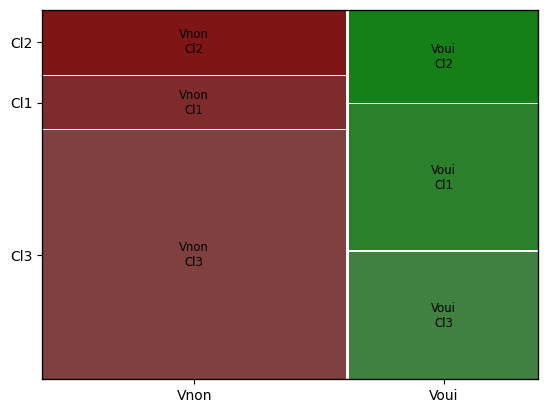

In [ ]:
mosaic(df,["Surv","Classe"])
plt.show()

## Références

**Mac Kinney W.** (2013). *Python for Data Analysis*, O’Reilly. [pdf](http://it-ebooks.info/book/104)